

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/KNN/KNN.ipynb)

# K-Nearest Neighbors

   The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.
   
## Pros

- It is extremely easy to implement.
- As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

## Cons

- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import math
import operator

# Importing the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Train-Test Split

In [3]:
np.random.seed(1)
msk = np.random.rand(
    len(df)) < 0.7  #An array containing True(with probability 0.7) and False
train = df[msk]  #Rows having array value true
test = df[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  395
Number of observations in the test data:  174


In [4]:
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


In [5]:
test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,1
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,2
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,2
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,1


# Euclidean Distance

It is used to measure the distance between samples p and q in an n-dimensional feature space:

<img src="https://drive.google.com/uc?export=view&id=13p3YOEqHybBrN8P5wpsPwBC6-7v3N98f">

For example, picture it as a "straight, connecting" line in a 2D feature space:

<img src="https://drive.google.com/uc?export=view&id=1Qc0nBRJTWBrJeKZvvj8dVk7YZJrvMpn8">

In [6]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

# Calculating the Nearest Neighbors

Let us consider that our data is scattered as shown below. Let the red circles denote Malignant and the green circles denote Benign:

<img src="https://drive.google.com/uc?export=view&id=1oEbIjxE0Ysdo5fEeNU5CGo4ruP544Ywz">

In this example we are calculating k=3 nearest neighbors so the curve of fit will look like:

<img src="https://drive.google.com/uc?export=view&id=1amCw22CqF0ideK9VWNIWQAASpZOWGPwi">

In [7]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []  #List to store all the distance values
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)  #Calculating the Euclidean Distance
        distances.append((trainingSet[x],dist))  #Appending the distance values to the 'distance' list
    distances.sort(key=operator.itemgetter(1))  #Sorting based on the disance value
    neighbors = []  #List to store all the neighbors
    for x in range(k):
        neighbors.append(distances[x][0])  #Number of neighbors is dependent on the value of k
    return neighbors

In [8]:
def getResponse(neighbors):
    classVotes = {}  #Dictionary to store labels with their counts
    for x in range(len(neighbors)):
        response = neighbors[x][-1]  #Label value of the neighbors
        if response in classVotes:
            classVotes[
                response] += 1  #if label value is already present increment it by 1
        else:
            classVotes[
                response] = 1  #If the label value is not yet present add it to the dictionary
    sortedVotes = sorted(
        classVotes.items(), key=operator.itemgetter(1), reverse=True
    )  #Sort the dictinary based on the count value in descending order
    return sortedVotes[0][
        0]  #Return the label with highest number of occurences

# Calculating the accuracy

Accuracy is one metric for evaluating machine learning models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

<img src="https://drive.google.com/uc?export=view&id=1gk-T6kanOB6mM_bs54jgyMs0Bu93V4sh">

In [9]:
def getAccuracy(testSet, predictions):
    correct = 0  #Variable to store the correct predictions
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:  #Checking whether the predicted value is same as label value
            correct += 1  #Incremented when both values are same
    return (correct / float(len(testSet))) * 100.0  #Accuracy = No. of Correct pred / Total number of pred

# Implementation on a smaller dataset

In [10]:
trainSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2],
            [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
testInstance = [4, 8, 6, 4, 3, 4, 10, 6, 1, 2]
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

[[5, 1, 1, 1, 2, 1, 3, 2, 1, 2]]


In [11]:
neighbors = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
             [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
response = getResponse(neighbors)
print(response)

2


In [12]:
testSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
           [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
predictions = [2, 2, 2]
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


# Implementation on the imported dataset

In [13]:
predictions = []  #List to store the predicted values
k = 3  # 3-Nearest Neighbors
trainingSet = train.values.tolist()  #List containing training data
testSet = test.values.tolist()  #List containing test data
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)  # Storing the predicted values
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, act

# Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

<img src="https://drive.google.com/uc?export=view&id=1hYthqmYW82QHRFnIpiGQDLt4r44aurv7">

In [14]:
print("Confusion Matrix")
y_test = []
for i in testSet:
    y_test.append(i[30])
from sklearn.metrics import confusion_matrix, accuracy_score
res = confusion_matrix(y_test, predictions)
print(res)

Confusion Matrix
[[ 52   5]
 [  6 111]]


# Accuracy

In [15]:
accuracy = accuracy_score(y_test, predictions) * 100
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 93.67816091954023%


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


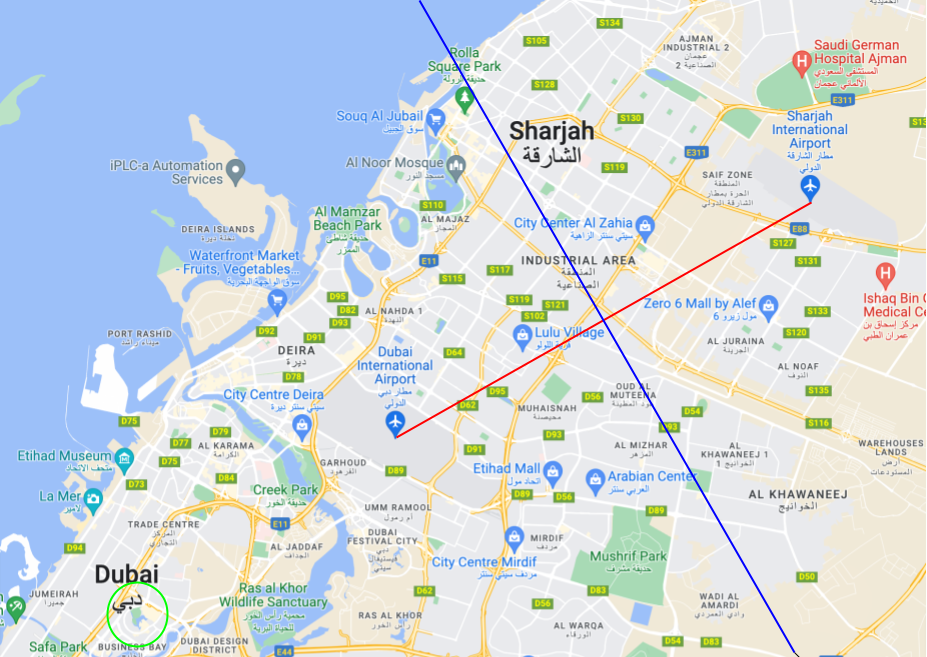

In [19]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
dubai=(93.372, 49.654)
sharjah=(93.379, 49.657)
burj=(93.370, 49.653)
#c=drawcircle(green, burj)
#line=drawline(dubai,sharjah)
#p=perpbis(line)
#draw(c,line,p)
from IPython.display import Image
Image('diagram.png')